# Plotting with Ease

### Set the file, units and axis labels:

In [28]:
filename = "data.csv"
units  = r"м$/$с"

xlabel = 'Ось X, м'
ylabel = 'Ось Y, с'

In [29]:
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
import math

# Load data
data = pd.read_csv(filename, engine='python', header=None)

# Exract arrays
x = np.array(data[0])
y = np.array(data[1])
t = sm.add_constant(x, prepend=False)

xerr = np.array(data[2]) if data.shape[1] > 2 else None
yerr = np.array(data[3]) if data.shape[1] > 3 else None
if yerr:
    yerr = np.array(data[3])
    
# Fitting
model = sm.OLS(y, t)
result = model.fit()

# Saving parameters
s_err, i_err = result.bse
s, i = result.params

In [30]:
# Showing result
result.summary().tables[1]

/home/smart/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
x1,2.0041,0.009,221.228,0.000,1.985 2.023
const,0.0052,0.098,0.053,0.958,-0.203 0.213


In [31]:
import matplotlib.pylab as plt
from matplotlib import rc

# Plot size
plt.rcParams['figure.figsize'] = (8, 5)

# LaTeX
rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")
rc('text.latex', preamble=r"\usepackage{lmodern}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', unicode=True)

# Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }

plt.rcParams.update(params)

# Get fig, ax
fig, ax = plt.subplots()



# Caclculate ranges
xmin = min(data[0])
xmax = max(data[0])
ymin = min(data[1])
ymax = max(data[1])

# Heuristics, starting from 0 is more beautiful when
# there is not too much empty space
def need_0(l, r):
    return True if (r > 0 and l > 0 and l/r < 0.2) else False
      
if need_0(xmin, xmax):
    xmin = 0
    
if need_0(ymin, ymax):
    ymin = 0
    
    

# Plot
plt.plot(data[0], data[1],'ro', np.linspace(xmin, xmax), np.linspace(xmin, xmax)*s + i,'k--')
if xerr or yerr:
    plt.errorbar(x, y, xerr=xerr, yerr=yerr)
    
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Label text
label = r"$K=(" + "{:.3f}".format(s) + r"\pm" + "{:.3f}".format(s_err) + ")$ " + units
ax.text(0.05, 0.9, label, transform=ax.transAxes, bbox={'facecolor':'white', 'edgecolor':'black', 'pad':10})

# Grid
ax.grid(color='#e5e5e5', linestyle='--', linewidth=0.2)

# Updating axes limits

def getlim(lim, lval):
    l, r = lim
    return (0, r) if (lval == 0) else (l, r)


plt.xlim(getlim(plt.xlim(), xmin))
plt.ylim(getlim(plt.ylim(), ymin))


# Save into variable
res = plt.gcf()

### View and Save:

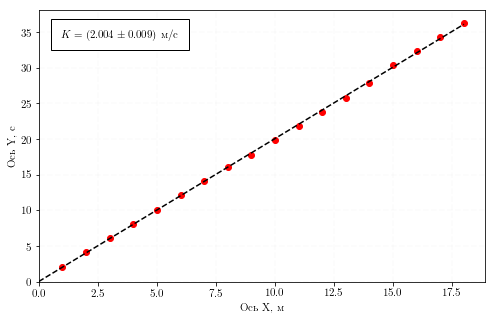

In [32]:
plt.show()

In [10]:
# Save file
res.savefig("graph.pdf", 
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )